In [1]:
#Fit random labels in a network
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Define transforms for the MNIST dataset
data_transform = transforms.Compose([
                transforms.Resize((28, 28)),
                transforms.ToTensor(),
                transforms.Normalize((0.1325,), (0.3105,))
                ])

In [3]:
def load_data_with_random_labels(train_size, test_size):
    # Load MNIST dataset and assign random labels to training data
    training_data = datasets.MNIST('data', train=True, download=False, 
                                   transform=data_transform)
    training_data.targets = torch.tensor(np.random.randint(0, 10, (len(training_data),)))
    train_data_loader = torch.utils.data.DataLoader(training_data, batch_size=train_size, shuffle=True)

    test_data = datasets.MNIST('data', train=False, transform=data_transform)
    test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=test_size, shuffle=True)

    return train_data_loader, test_data_loader

In [4]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.fc1 = nn.Linear(16 * 5 * 5, 100)
        self.fc2 = nn.Linear(100, 80)
        self.fc3 = nn.Linear(80, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
# Load data
train_batch_size = 100
test_batch_size = 100
train_loader, test_loader = load_data_with_random_labels(train_batch_size, test_batch_size)

In [6]:
def train_epoch(net, optim_func, train_loader):
    net.train()
    total_loss = 0
    total_correct = 0
    batches = 0

    for idx, (inputs, labels) in enumerate(train_loader):
        batches += 1
        inputs, labels = Variable(inputs), Variable(labels)
        optim_func.zero_grad()

        preds = net(inputs)
        loss_value = criterion(preds, labels)
        loss_value.backward()
        optim_func.step()

        total_loss += loss_value.data
        predictions = np.argmax(preds.data, axis=1)
        total_correct += np.equal(predictions, labels.data).sum()

    avg_loss = (total_loss * 100) / len(train_loader.dataset)
    accuracy = 100.0 * total_correct / len(train_loader.dataset)
    return avg_loss, accuracy

In [7]:
def evaluate_model(net, epoch_idx, test_loader):
    net.eval()
    total_loss = 0
    total_correct = 0

    for inputs, labels in test_loader:
        inputs, labels = Variable(inputs), Variable(labels)
        preds = net(inputs)
        loss_value = criterion(preds, labels)
        total_loss += loss_value.data
        predictions = np.argmax(preds.data, axis=1)
        total_correct += np.equal(predictions, labels.data).sum()

    avg_test_loss = (total_loss * 100) / len(test_loader.dataset)
    print(f'\nEvaluation at Epoch {epoch_idx}: Average Loss: {avg_test_loss:.4f}, '
          f'Accuracy: {100. * total_correct / len(test_loader.dataset):.0f}%\n')
    return avg_test_loss

In [8]:
# Initialize the model, optimizer, and criterion
net = NeuralNet()
optimizer_func = optim.Adam(net.parameters(), lr=0.0001)
train_loss_list = []
test_loss_list = []
epoch_list = []

epochs_total = 100
criterion = torch.nn.CrossEntropyLoss()

# Training loop
for epoch_num in range(1, epochs_total + 1):
    print(f'Starting training for epoch {epoch_num}')
    tr_loss, tr_accuracy = train_epoch(net, optimizer_func, train_loader)
    train_loss_list.append(tr_loss)
    eval_loss = evaluate_model(net, epoch_num, test_loader)
    test_loss_list.append(eval_loss)
    epoch_list.append(epoch_num)

Starting training for epoch 1

Evaluation at Epoch 1: Average Loss: 2.2990, Accuracy: 11%

Starting training for epoch 2

Evaluation at Epoch 2: Average Loss: 2.2995, Accuracy: 8%

Starting training for epoch 3

Evaluation at Epoch 3: Average Loss: 2.3004, Accuracy: 7%

Starting training for epoch 4

Evaluation at Epoch 4: Average Loss: 2.2980, Accuracy: 10%

Starting training for epoch 5

Evaluation at Epoch 5: Average Loss: 2.2961, Accuracy: 13%

Starting training for epoch 6

Evaluation at Epoch 6: Average Loss: 2.2970, Accuracy: 14%

Starting training for epoch 7

Evaluation at Epoch 7: Average Loss: 2.2939, Accuracy: 16%

Starting training for epoch 8

Evaluation at Epoch 8: Average Loss: 2.2933, Accuracy: 16%

Starting training for epoch 9

Evaluation at Epoch 9: Average Loss: 2.2941, Accuracy: 13%

Starting training for epoch 10

Evaluation at Epoch 10: Average Loss: 2.2894, Accuracy: 16%

Starting training for epoch 11

Evaluation at Epoch 11: Average Loss: 2.2916, Accuracy: 13

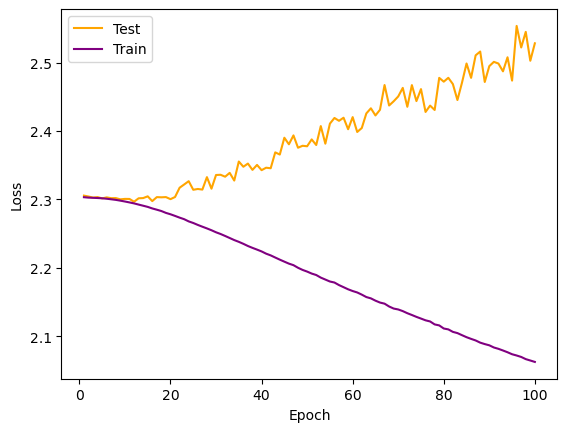

In [10]:
plt.plot(epoch_list, test_loss_list, color="orange")
plt.plot(epoch_list, train_loss_list, color="purple")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Test', 'Train'])
plt.show()